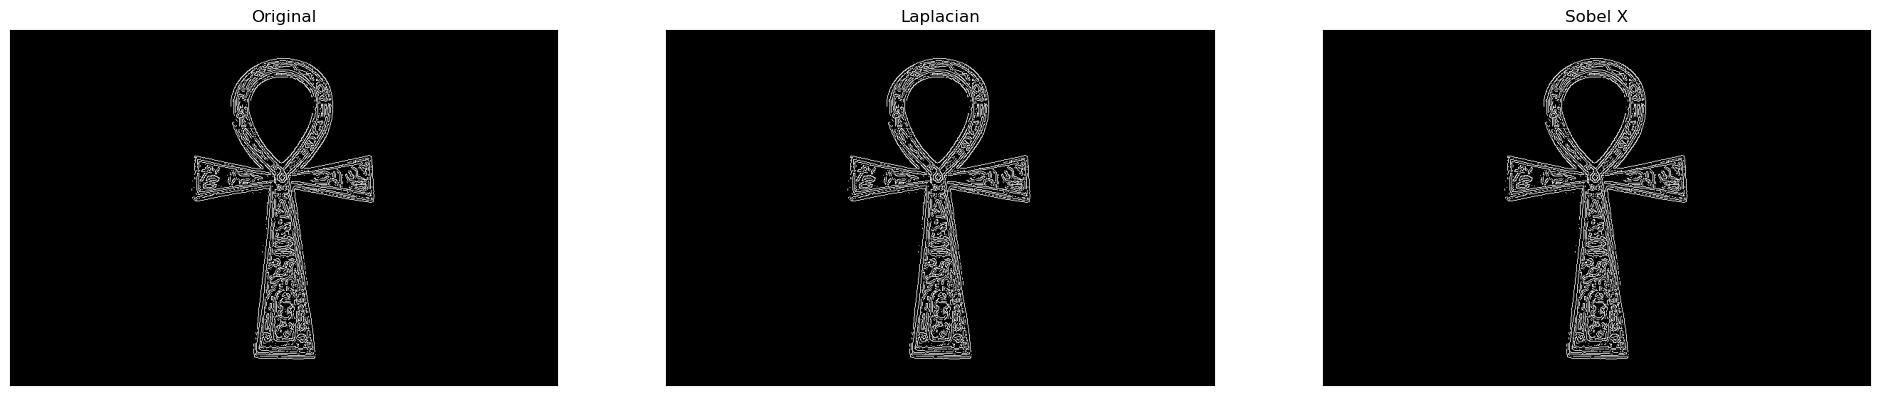

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('The-Ankh.jpg',0)
edges100 = cv2.Canny(img,100,100)
edges200 = cv2.Canny(img,200,200)
edges = cv2.Canny(img,100,200)

plt.figure(figsize= (24,8))
plt.subplot(1,3,1),plt.imshow(edges100,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges100,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges100,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.show()

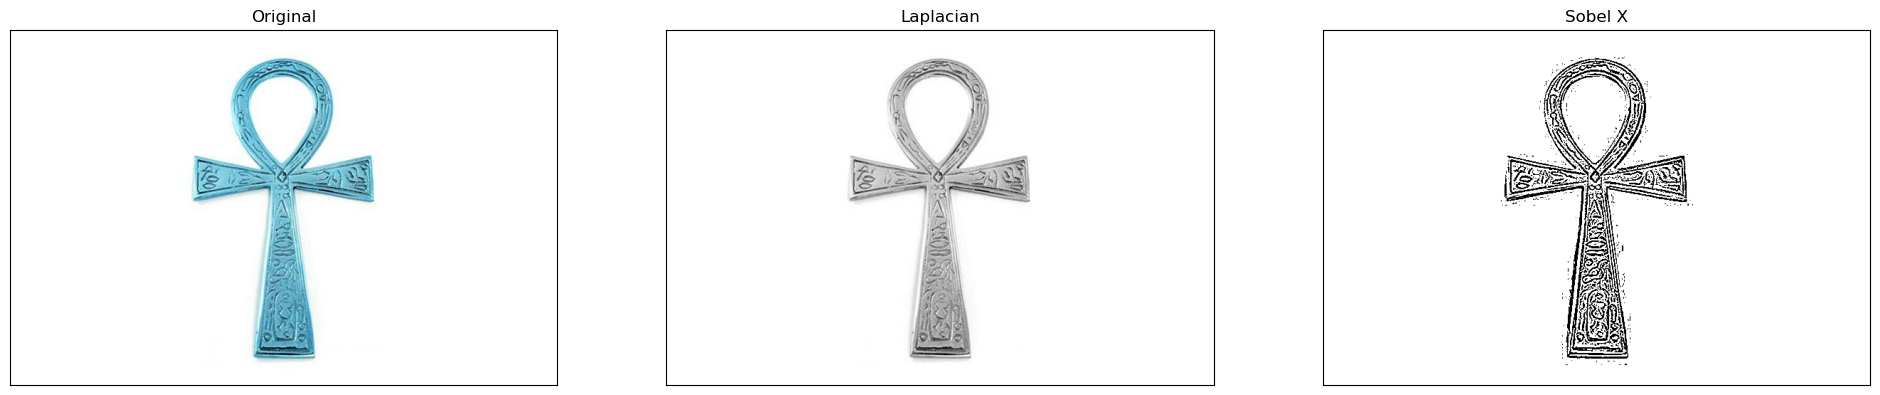

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('The-Ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#imgray = cv2.GaussianBlur(imgray,(5,5),0)
#ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel3)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel3)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel5)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel5)
erosion = cv2.erode(opening,kernel3,iterations = 1)



plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()



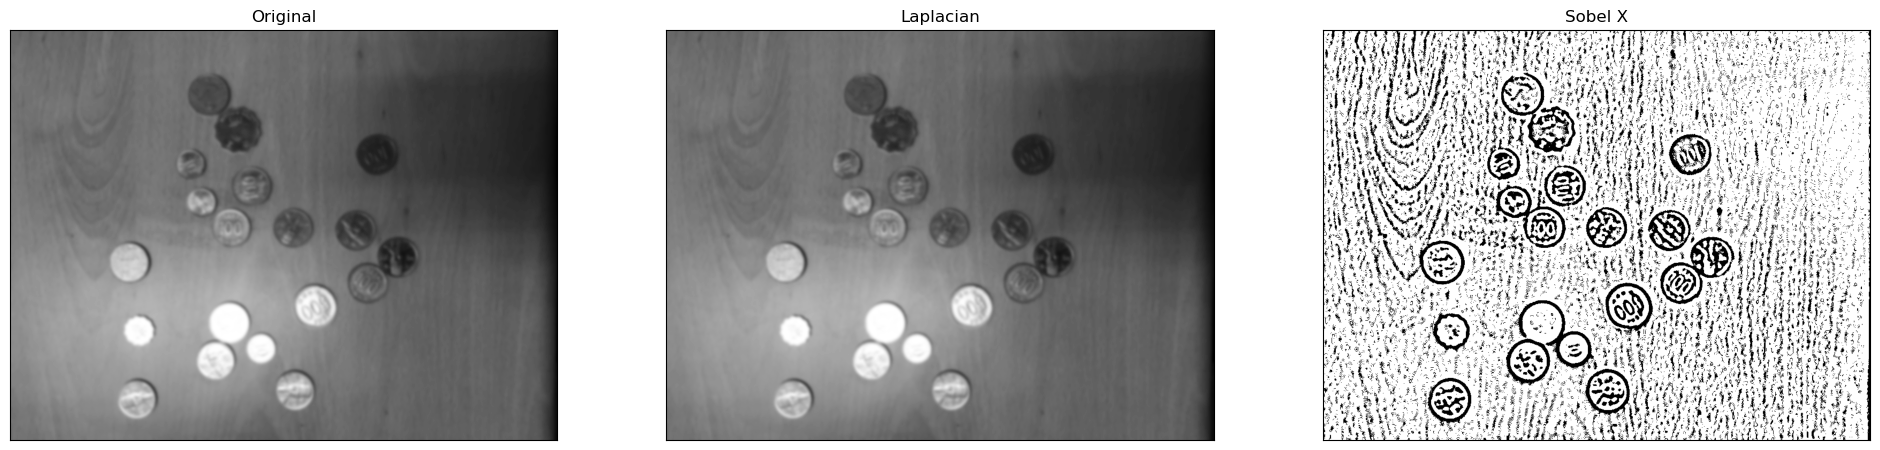

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2526: error: (-215:Assertion failed) 0 <= contourIdx && contourIdx < (int)last in function 'cv::drawContours'


In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread('coin.jpg')
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
gray_blur  = cv2.GaussianBlur(gray,(15,15),0)
#ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(gray_blur,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)

kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)
#opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
#erosion = cv2.erode(opening,kernel3,iterations = 1)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(gray_blur,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(gray_blur,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

size = []

for i in contours:
    size.append((i, contours[i].shape[0]))
    
    #ellipse = cv2.fitEllipse(cnt)
    #cv2.ellipse(im, ellipse, (0,255,0), 2)

cnt = contours[9]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(approx)
x,y,w,h = cv2.boundingRect(cnt)
rect = cv2.minAreaRect(cnt)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)







